#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras import optimizers
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K
from keras.utils import plot_model

import cv2    

from sklearn.metrics import f1_score

In [3]:
image_folder = '../input/celeba-dataset/img_align_celeba/img_align_celeba/'
train_samples = 10000
validation_samples = 2500
test_samples = 1000
batch_size  = 16
epochs = 10
height = 218 
width = 178

In [4]:
if K.image_data_format() == 'channel_first':
    input_shape = (3, height, width)
else:
    input_shape = (height, width, 3)

#### Exploratory Data Analysis
Reading attribute CSV file.

In [5]:
df = pd.read_csv('../input/celeba-dataset/list_attr_celeba.csv', index_col=0)

In [6]:
df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [7]:
df.shape

(202599, 40)

In [8]:
df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [9]:
df['Male'].unique()

array([-1,  1])

In [ ]:
"1" represents positive while "-1" represents negative

Text(0, 0.5, 'Male VS Female')

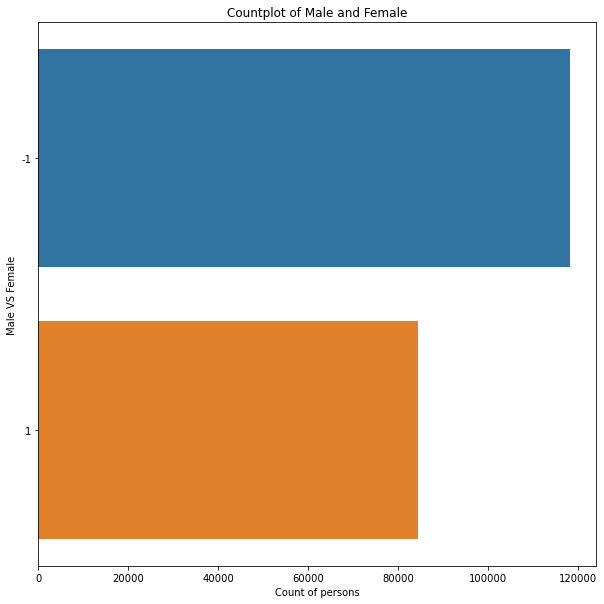

In [11]:
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Male', data =df)
plt.title('Countplot of Male and Female')
plt.xlabel('Count of persons')
plt.ylabel('Male VS Female')

As we can see there are more number of female gender as compared to male gender so we need to ballance the dataset.

Now let's display some random images from dataset with few attributes to understand the values of attribute and corresponding image clearly.

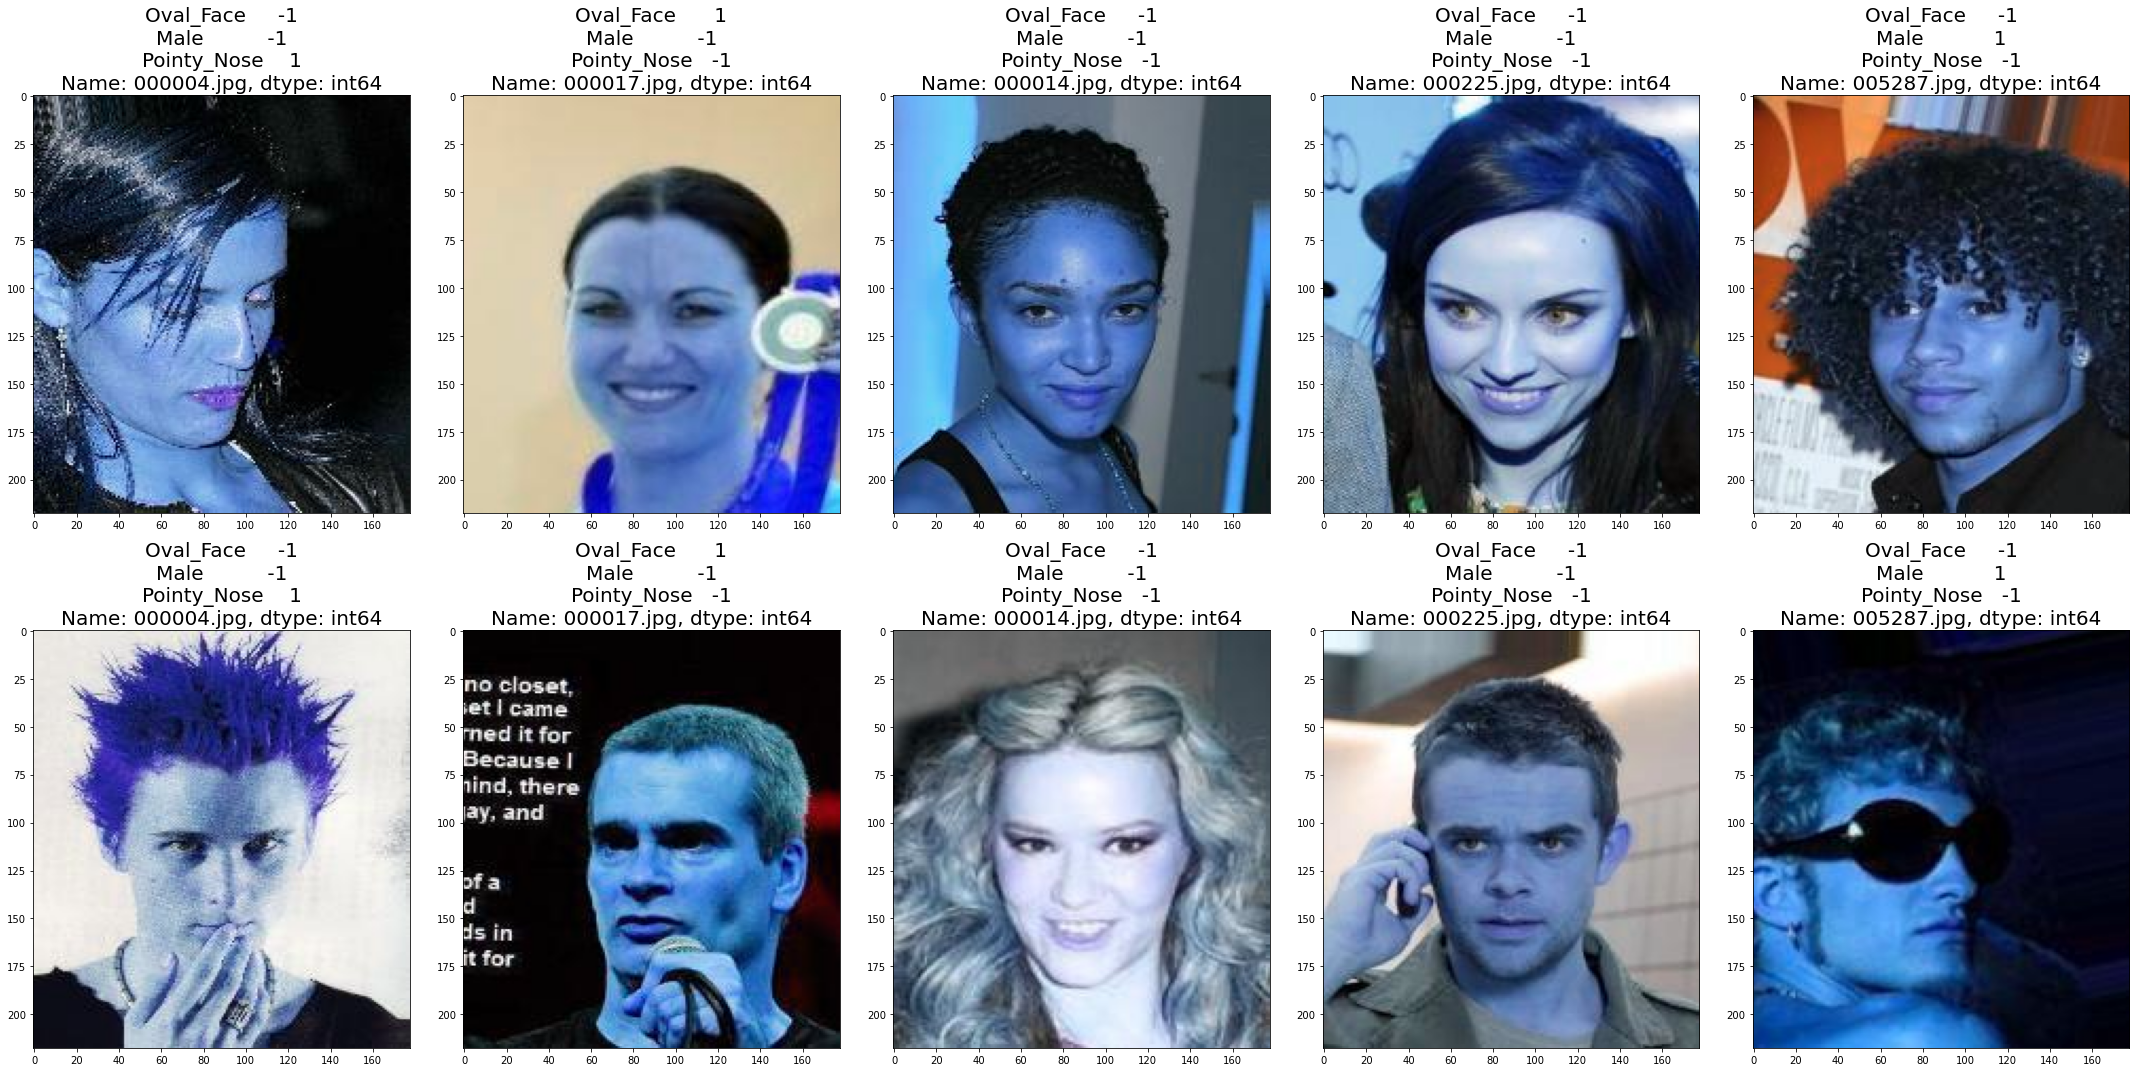

In [12]:
fig = plt.figure(figsize = (30, 15))
plt.subplot(2,5,1)
image = cv2.imread(image_folder + '000004.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000004.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(image_folder + '000017.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000017.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(image_folder + '000014.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000014.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(image_folder + '000225.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000225.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(image_folder + '005287.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['005287.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(image_folder + '000150.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000004.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(image_folder + '000999.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000017.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(image_folder + '001014.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000014.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(image_folder + '052225.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['000225.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(image_folder + '065877.jpg')
plt.imshow(image, aspect="auto")
attr = df.loc['005287.jpg'.split('/')[-1]][['Oval_Face','Male','Pointy_Nose']]
plt.title(str(attr), fontsize = 20)


plt.tight_layout()

The recommended partitioning of images into training, validation, testing of the data set is:

1. 1-162770 images for training
2. 162771-182637 images for validation
3. 182638-202599 images for testing

As the size of the dataset is very huge we will take only subset of it for our experiment as follows:

1. 10000 images for training
2. 5000 images for validation

In [13]:
# Reading partition file data
df_partition_data = pd.read_csv('../input/celeba-dataset/list_eval_partition.csv')
df_partition_data.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [14]:
df_partition_data['partition'].value_counts()

0    162770
2     19962
1     19867
Name: partition, dtype: int64

* 0 indicates training set
* 1 indicates validation set
* 2 indicates testing set

Now let's join the partition dataframe(df_partition_data) with our target attribute from actual dataframe(df).

In [15]:
df_partition_data.set_index('image_id', inplace=True)
df = df_partition_data.join(df['Male'], how='inner')

In [16]:
df.head()

,partition,Male
image_id,,
000001.jpg,0,-1
000002.jpg,0,-1
000003.jpg,0,1
000004.jpg,0,-1
000005.jpg,0,-1


In [17]:
def load_image(file_name):
    img = load_img(file_name)
    X = img_to_array(img)/255.
    X = X.reshape((1,) + X.shape)

    return X

In [18]:
def generate_df(partition, attribute, nsamples):
    new_df = df[(df['partition'] == partition) & (df[attribute] == 1)].sample(int(nsamples/2))
    new_df = pd.concat([new_df, df[(df['partition'] == partition) & (df[attribute] == -1)].sample(int(nsamples/2))])
    
    # Preprocessing image and setting the target attribute in the appropriate fromat for test and validation data
    if partition!=2:
        X = np.array([load_image(image_folder + file_name) for file_name in new_df.index])
        X = X.reshape(X.shape[0], 218, 178, 3)
        y = np_utils.to_categorical(new_df[attribute],2)
    else:
        X = []
        y = []

        for index, target in new_df.iterrows():
            img = cv2.imread(image_folder + index)
            img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (width, height)).astype(np.float32) / 255.0
            img = np.expand_dims(img, axis =0)
            X.append(img)
            y.append(target[attribute])
        
    return X, y

In [19]:
# Getting train dataframe
X_train, y_train = generate_df(0, 'Male', train_samples)

In [20]:
# Preparing train data with data augmentation
datagen_train =  ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

datagen_train.fit(X_train)

datagen_train = datagen_train.flow(
X_train, y_train,
batch_size=batch_size,
)

In [21]:
# Getting validation dataframe
X_val, y_val = generate_df(1, 'Male', validation_samples)

In [22]:
# Preparing train data with data augmentation
datagen_val =  ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

datagen_val.fit(X_val)

datagen_val = datagen_val.flow(
X_val, y_val,
batch_size=batch_size,
)

#### Defining the model architecture

In [23]:
model = Sequential()

#first convolutional layer
model.add(Conv2D(32, (3,3), input_shape = input_shape, padding ='same'))
model.add(Activation('relu'))

#second convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu', padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

#third convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.5))

#fourth convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.5))

#flatten
model.add(Flatten())

#first dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))

#second dense layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.5))

#output layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [24]:
from keras.optimizers import Adam

In [25]:
#compiling the model
model.compile(optimizer =Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 178, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 218, 178, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 218, 178, 64)      18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 218, 178, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 89, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 87, 64)       36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 107, 87, 64)       2

In [27]:
checkpointer = ModelCheckpoint(filepath='model.h5', 
                               verbose=1, 
                               save_best_only=True)

In [28]:
history = model.fit_generator(datagen_train,
                    validation_data = (X_val, y_val),
                    steps_per_epoch= train_samples/batch_size,
                    epochs= epochs,
                    callbacks=[checkpointer],
                    verbose=1
                    )

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.8731
Epoch 00001: val_loss improved from inf to 0.02256, saving model to model.h5
625/625 [==============================] - 79s 127ms/step - loss: 0.3238 - accuracy: 0.8731 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9972
Epoch 00002: val_loss improved from 0.02256 to 0.00430, saving model to model.h5
625/625 [==============================] - 79s 126ms/step - loss: 0.0234 - accuracy: 0.9972 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9995
Epoch 00003: val_loss improved from 0.00430 to 0.00074, saving model to model.h5
625/625 [==============================] - 78s 125ms/step - loss: 0.0064 - accuracy: 0.9995 - val_loss: 7.4145e-04 - val_accuracy: 1.0000
Epoch 4/10
625/625 [==============================] - ETA: 0s - los

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

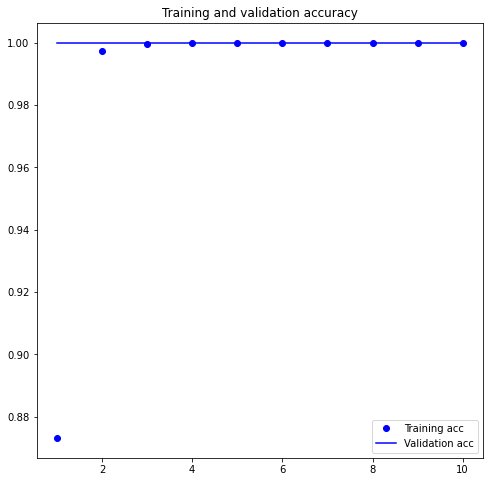

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (8, 8))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

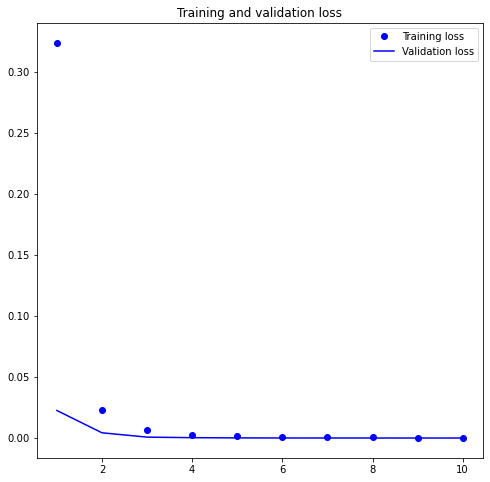

In [31]:
plt.figure(figsize = (8, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
from keras.models import load_model

In [33]:
#load the best model
model = load_model('model.h5')

In [34]:
def gender_prediction(filename):   
    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    
    # prediction
    result = model.predict(im)
    prediction = np.argmax(result)
    
    return result

In [35]:
#select random images of the test partition
df_test = df[(df['partition'] == 2)].sample(5)
df_test.head()

,partition,Male
image_id,,
195613.jpg,2,1
188749.jpg,2,-1
187175.jpg,2,-1
189453.jpg,2,-1
191886.jpg,2,-1


Predicted Label: Male


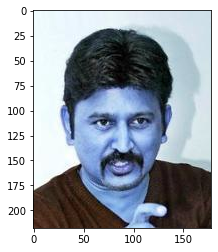

In [36]:
filename = image_folder +df_test.index[0]
image = cv2.imread(filename)
image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
image = np.expand_dims(image, axis =0)
    
# prediction
result = model.predict(image)
prediction = np.argmax(result)
#print(result)
if prediction == 1:
    print("Predicted Label: Male")

else:
    print("Predicted Label: Female")


image = cv2.imread(filename)
plt.imshow(image)
plt.show()

Predicted Label: Male


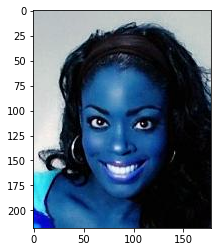

In [37]:
filename = image_folder +df_test.index[1]
image = cv2.imread(filename)
image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
image = np.expand_dims(image, axis =0)
    
# prediction
result = model.predict(image)
prediction = np.argmax(result)
if prediction == 1:
    print("Predicted Label: Male")

else:
    print("Predicted Label: Female")


image = cv2.imread(filename)
plt.imshow(image)
plt.show()

Predicted Label: Male


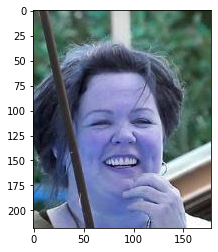

In [40]:
filename = image_folder +df_test.index[2]
image = cv2.imread(filename)
image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
image = np.expand_dims(image, axis =0)
    
# prediction
result = model.predict(image)
prediction = np.argmax(result)
if prediction == 1:
    print("Predicted Label: Male")

else:
    print("Predicted Label: Female")


image = cv2.imread(filename)
plt.imshow(image)
plt.show()